In [79]:
import pandas as pd

In [80]:
name1880 = pd.read_csv('/Users/zhangchen/Downloads/names/yob1880.txt',names = ['name', 'sex', 'births'])

In [81]:
name1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [82]:
name1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [83]:
name1880.groupby('sex').births.sum()
# name1880.groupby('sex').sum('births')    not working

sex
F     90994
M    110490
Name: births, dtype: int64

In [84]:
years = range(1880,2011)
pieces = []
for year in years:
    path = '/Users/zhangchen/Downloads/names/yob%d.txt' %year
    name =['name', 'sex', 'births']
    file = pd.read_csv(path, names = name)
    file['year'] = year #file is dataframe 
    pieces.append(file) #make it from dataframe to the list[{names: 1 1, sex: 1 1 ...}]
names = pd.concat(pieces,ignore_index=True)

In [85]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692112 entries, 0 to 1692111
Data columns (total 4 columns):
name      object
sex       object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


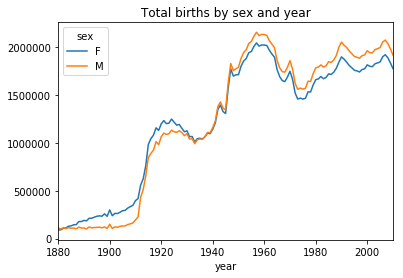

In [86]:
bbnames = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)
bbnames.plot(title = 'Total births by sex and year')

In [87]:
def add_prop(group):
    group['prop']= group.births/group.births.sum()
    return(group) 
names = names.groupby(['year','sex']).apply(add_prop)
names.info()
names.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692112 entries, 0 to 1692111
Data columns (total 5 columns):
name      object
sex       object
births    int64
year      int64
prop      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 64.5+ MB


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [88]:
import numpy as np

In [89]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [90]:
def top_1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]   
top1000 = names.groupby(['year','sex']).apply(top_1000)
top1000.info()
top1000.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 261877 entries, (1880, F, 0) to (2010, M, 1678853)
Data columns (total 5 columns):
name      261877 non-null object
sex       261877 non-null object
births    261877 non-null int64
year      261877 non-null int64
prop      261877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 13.7+ MB


name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077642
         1       Anna   F    2604  1880  0.028617
         2       Emma   F    2003  1880  0.022012
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [91]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077642
         1       Anna   F    2604  1880  0.028617
         2       Emma   F    2003  1880  0.022012
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [92]:
top1000.reset_index(drop=True,inplace=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [93]:
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)

In [94]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12c113668>,
      dtype=object)

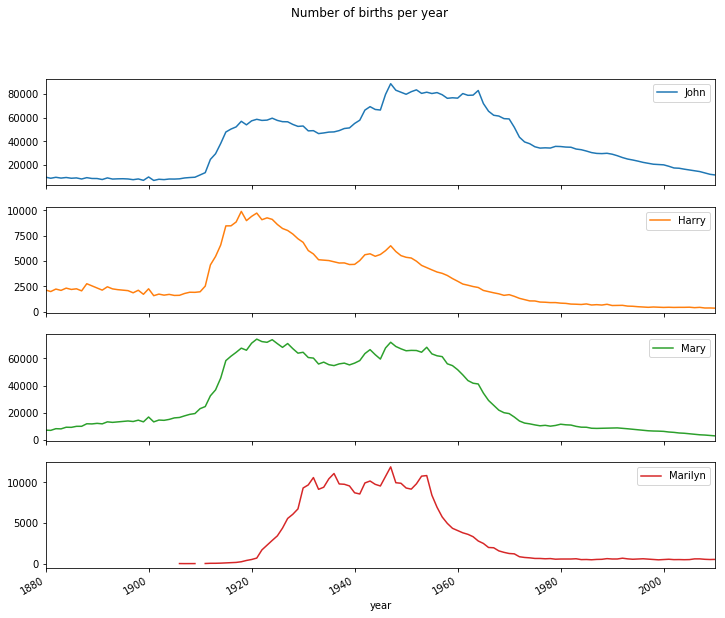

In [95]:
subset.plot(subplots = True, figsize = (12,10), grid = False, title = "Number of births per year")

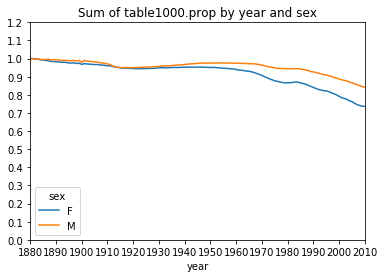

In [96]:
table = top1000.pivot_table('prop', index = 'year', columns = 'sex', aggfunc = sum)
table.plot(title = 'Sum of table1000.prop by year and sex', yticks = np.linspace(0,1.2,13), xticks = np.arange(1880,2011,10))

In [97]:
boys = top1000[top1000.sex == 'M']
#girls = top1000[top1000.sex == 'F']
df = boys[boys.year==2010]

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 260877 to 261876
Data columns (total 5 columns):
name      1000 non-null object
sex       1000 non-null object
births    1000 non-null int64
year      1000 non-null int64
prop      1000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [99]:
prop_cumsum = df.sort_values(by = 'prop', ascending = False).prop.cumsum()

In [100]:
prop_cumsum.searchsorted(0.5)

116

In [101]:
df = boys[boys.year == 1900]

In [102]:
prop_cumsum = df.sort_values(by = 'prop',ascending = False).prop.cumsum()

In [103]:
prop_cumsum.searchsorted(0.5)

24

In [104]:
def prop_cum(group):
    prop_cumsum = group.sort_values(by = 'prop', ascending = False).prop.cumsum()
    return prop_cumsum.searchsorted(0.5)+1
div = top1000.groupby(['year','sex']).apply(prop_cum)
div1 = div.unstack('sex')

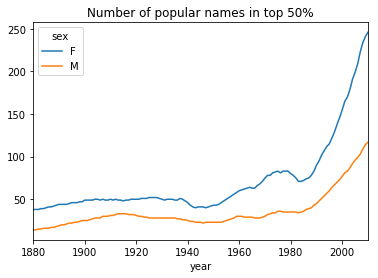

In [105]:
div1.plot(title = 'Number of popular names in top 50%')

In [162]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [168]:
#two ways to get the last letter of each name
get_last_name = lambda x: x[-1]
last_letters = names.name.map(get_last_name) # get a series
last_letters.name = 'letter'
last_letters.head()

0    y
1    a
2    a
3    h
4    e
Name: letter, dtype: object

In [177]:
last_letters1 = pd.Series([x[-1] for x in names.name])
last_letters1.name = 'letter'
last_letters1.head()

0    y
1    a
2    a
3    h
4    e
Name: letter, dtype: object

In [107]:
table = names.pivot_table('births', index = last_letters, columns = ['sex','year'], aggfunc = sum)  #index is a series,which from dataframe names
subtable = table.reindex(columns = [1910, 1960, 2010],level='year')

In [108]:
subtable.head()

sex            F                            M                    
year        1910      1960      2010     1910      1960      2010
letter                                                           
a       108399.0  691261.0  676865.0    977.0    5212.0   28868.0
b            NaN     694.0     455.0    411.0    3912.0   39276.0
c            5.0      49.0     956.0    482.0   15454.0   23348.0
d         6751.0    3731.0    2642.0  22113.0  262116.0   44828.0
e       133601.0  435030.0  316764.0  28665.0  178768.0  130253.0

In [109]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022010.0
     2010    1775345.0
M    1910     194212.0
     1960    2132155.0
     2010    1916476.0
dtype: float64

In [110]:
letter_prop=subtable/subtable.sum().astype(float)

In [116]:
letter_prop.head()
letter_prop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, a to z
Data columns (total 6 columns):
(F, 1910)    21 non-null float64
(F, 1960)    24 non-null float64
(F, 2010)    26 non-null float64
(M, 1910)    24 non-null float64
(M, 1960)    24 non-null float64
(M, 2010)    26 non-null float64
dtypes: float64(6)
memory usage: 1.4+ KB


In [117]:
import matplotlib.pyplot as plt

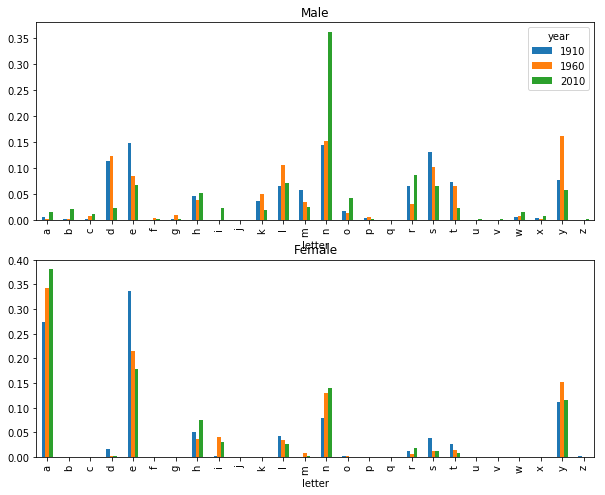

In [118]:
fig, axs = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',ax=axs[0],title='Male')
letter_prop['F'].plot(kind='bar',ax=axs[1],title='Female',legend = False)

In [134]:
letter_prop.swaplevel('sex','year',axis=1).sortlevel('year',axis=1)
#letter_prop.sortlevel('year',axis=1)

AttributeError: 'DataFrame' object has no attribute 'sortlevel'

KeyError: '1910'

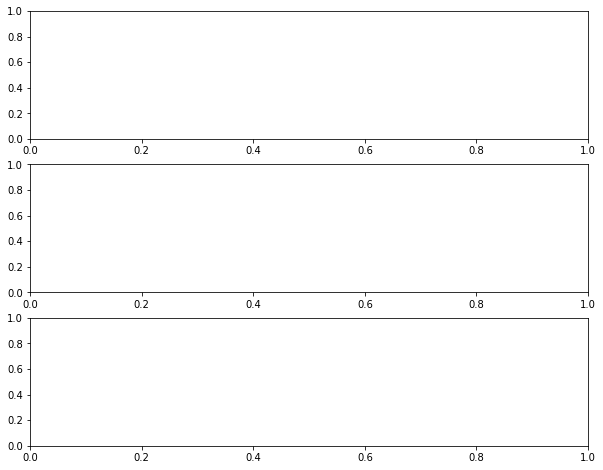

In [131]:
fig, axs = plt.subplots(3,1,figsize=(10,8))
letter_prop['1910'].plot(kind = 'bar', ax = axs[0], title = '1910')
letter_prop['1960'].plot(kind = 'bar', ax = axs[1], title = '1960',legend = False)
letter_prop['2010'].plot(kind = 'bar', ax = axs[2], title = '2010',legend = False)

In [151]:
letter_prop = table/table.sum()
letter_prop[:7]

sex            F                                                              \
year        1880      1881      1882      1883      1884      1885      1886   
letter                                                                         
a       0.345583  0.343447  0.338776  0.341251  0.338555  0.341272  0.339715   
b            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
c            NaN       NaN  0.000046  0.000045       NaN       NaN       NaN   
d       0.006693  0.006601  0.006806  0.007212  0.007100  0.006479  0.006967   
e       0.366848  0.370624  0.374595  0.373160  0.372728  0.372898  0.372808   
f            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
g       0.000077  0.000054  0.000111  0.000071  0.000186  0.000083  0.000125   

sex                                   ...         M                      \
year        1887      1888      1889  ...      2001      2002      2003   
letter                                ...                                 
a       0.335263  0.332770  0.328712  ...  0.020164  0.020021  0.019179   
b            NaN       NaN       NaN  ...  0.026259  0.025419  0.024369   
c            NaN       NaN       NaN  ...  0.013969  0.014050  0.014041   
d       0.007035  0.007267  0.007703  ...  0.031364  0.028810  0.027075   
e       0.372322  0.373683  0.373737  ...  0.074916  0.074602  0.073400   
f            NaN       NaN       NaN  ...  0.000905  0.000937  0.000922   
g       0.000171  0.000246  0.000157  ...  0.001109  0.001074  0.001020   

sex                                                                           
year        2004      2005      2006      2007      2008      2009      2010  
letter                                                                        
a       0.019510  0.018487  0.017645  0.016759  0.016205  0.015962  0.015063  
b       0.023167  0.021649  0.020781  0.020370  0.019666  0.019728  0.020494  
c       0.013510  0.013088  0.012991  0.012978  0.012459  0.012190  0.012183  
d       0.026135  0.025436  0.025088  0.024472  0.023587  0.023397  0.023391  
e       0.071708  0.070798  0.069740  0.069452  0.069356  0.068645  0.067965  
f       0.000961  0.000996  0.000960  0.001008  0.001079  0.001118  0.001206  
g       0.000927  0.000944  0.000942  0.000987  0.001014  0.001212  0.001407  

[7 rows x 262 columns]

In [145]:
dny_ts = letter_prop.loc[['d', 'n', 'y'],'M'].T

In [149]:
dny_ts.head()

letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


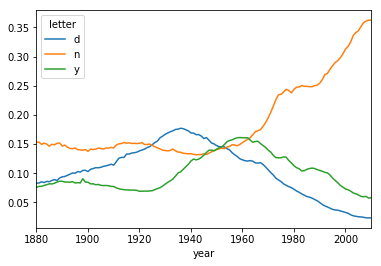

In [150]:
dny_ts.plot()

In [186]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
#mask returns true or false
lesley_like = all_names[mask]

In [187]:
lesley_like 

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [188]:
filtered = top1000[top1000.name.isin(lesley_like)] #dataframe and array
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    370568
Lesly      10072
Name: births, dtype: int64

In [226]:
nortable = filtered.pivot_table('births',index='year', columns='sex', aggfunc = sum)

In [227]:
nortable.tail()

sex,F,M
year,,
2006,4168.0,NaN
2007,3808.0,NaN
2008,3024.0,NaN
2009,2579.0,NaN
2010,2070.0,NaN


In [229]:
table=nortable.div(nortable.sum(1),axis = 0) #1 here means calculate prop by index, so not able to use the way below
table.head()
#table1 = nortable/nortable.sum(1) 
#table1

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


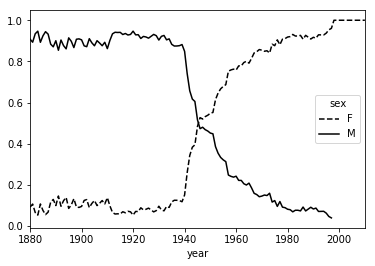

In [230]:
table.plot(style={'M':'k-','F':'k--'})